#This part covers all what we need to know about data from collecting to labeling and finally validating it.


------------------


*  without **data** there is no ML== Data are first-class citizens

(If you are like me want to incorporate cues while discussing a subject, particularly when it pertains to DATA, these two cues highlights the importance of DATA)

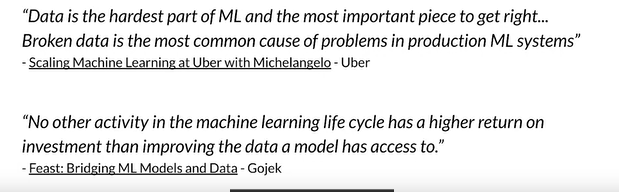

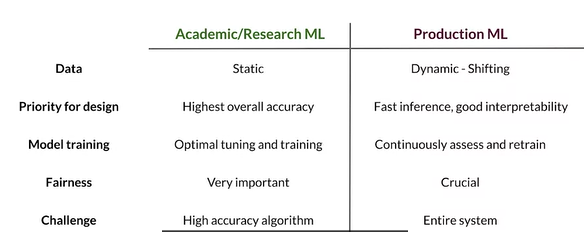

#ML PIPELINES

* ML pipelines are the heart of any deployment process.

* ML pipelines are DAG(Direct Acyclic Graph) [ DAGs == define the sequencing of the tasks to be performed]

**Pipeline orchestration frameworks**
* they are responsible for scheduling various components in an ML pipeline.
(Airflow,Argo,Celery,luigi,Kubeflow)







#TensorFlow Extended(TFX)


it is an end to end platform for deploying ML pipelines developed by GOOGLE.
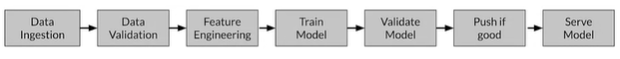


# Collecting data

* What kind of data we need

* How much data we need

* Translate user needs into data needs ( needed features / lables ( annotated or not))


* Identify data sources(we need to know how many time we need to refresh our training set)

*  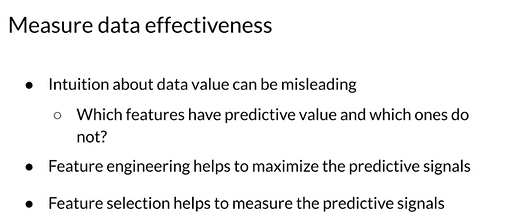

* Responsible data : security privay & fairness

Reducing bias==>  design a set of fair labeling system: accurate labels are necessary for supervised learning.


Raters== people who label data ( Generalists / subject matter experts / your own users)



How ML systems can fail users:

* Representational Harms: reflect a negative stereotype about a certain group

* Opportunity denial : make predictions that have negative real life consequences that could result in lasting impacts

* Disproportionate product failure:
skewed data ==> skewed output

* Harm by disadvantage:

#Data Labeling

Variety of methods:

* Process feedback(Direct labeling): click-through ==> continuous creation of the training data/ labels are evolved quickly/ clicks are a strong label signs




* Human labeling : ask humans to do it


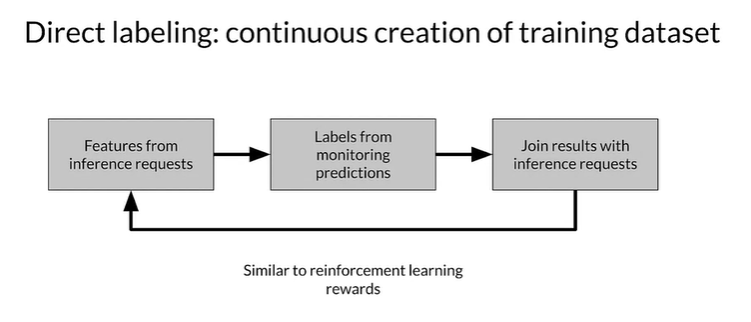



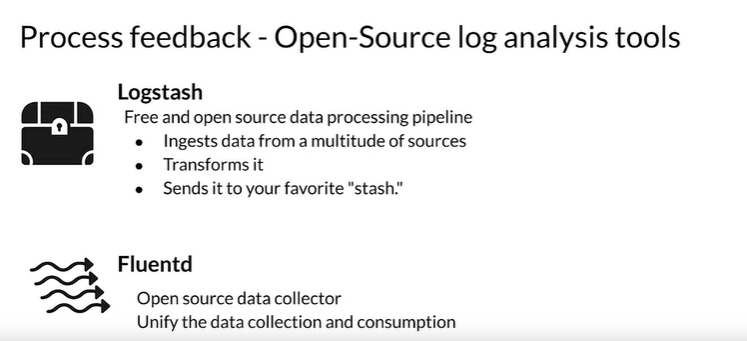

#Validating Data

Detecting data issues:

* Drift and skews

Drift: changes in data over time

skew: difference two static versions (like diff between train set and test set)


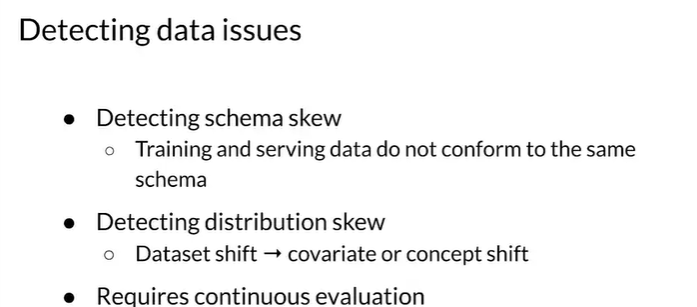


* TensorFlow Data Validation:TFDV

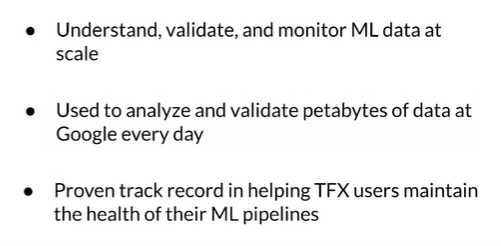

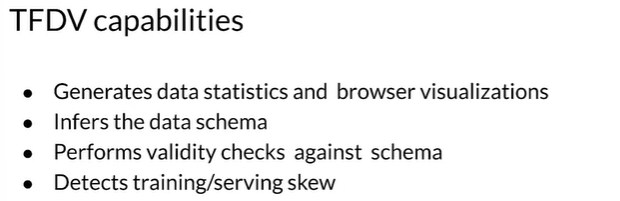

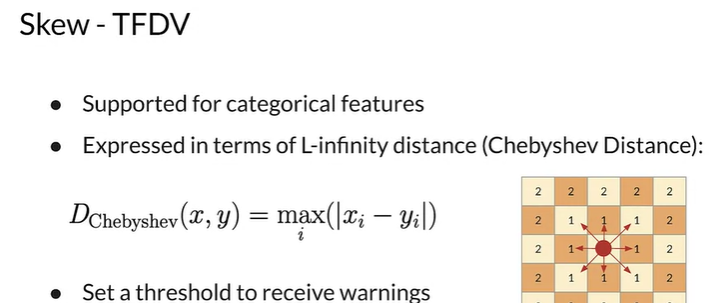

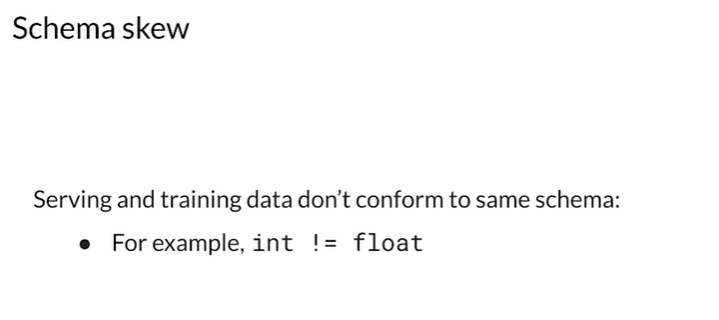

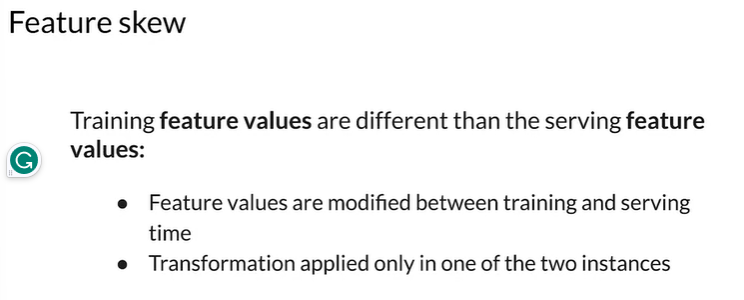

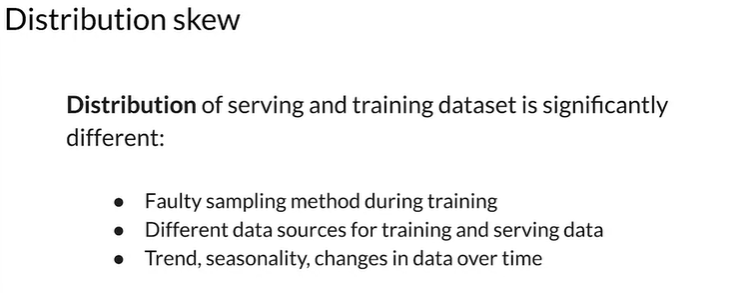

-------------------------

TFDV LAB

-----------------

#Tensorflow data validation

the usual workflow

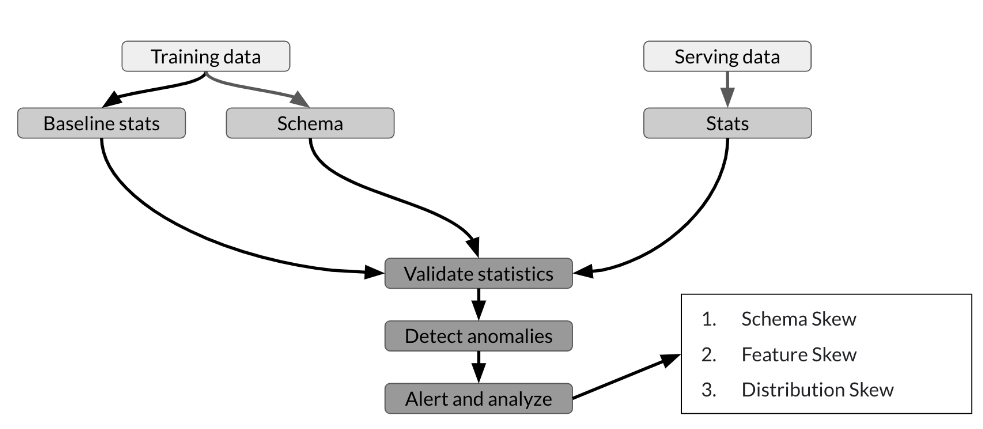

In [ ]:
!pip install tensorflow_data_validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 4.6 MB/s et

In [ ]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


* **Downloading the dataset**: the census income dataset will be used to predict wether an individual earns more than 50k US dollars annually.

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/LOPS_DATA/adult.data', skipinitialspace=True)

In [ ]:
#split the data into train and test
train_data,test_data= train_test_split(data,test_size=0.2,shuffle=False)

In [ ]:
print(f'shape of the train data{train_data.shape}\nshape of the test data{test_data.shape} ')

shape of the train data(26048, 15)
shape of the test data(6513, 15) 


In [ ]:
train_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


* **Adding extra rows to test data**

To demonstrate how TFDV can detect anomalies later, you will add a few extra rows to the evaluation dataset. These are either malformed or have values that will trigger certain alarms later in this notebook.

In [ ]:
## add_extra_rows function to add malformed data
def add_extra_rows(df):
    rows = [
        {
            'age': 46,
            'workclass': 'Private',
            'fnlwgt': 257473,
            'education': 'Bachelors',
            'education-num': 8,
            'marital-status': 'Married-civ-spouse',
            'occupation': 'Plumber',
            'relationship': 'Husband',
            'race': 'Other',
            'sex': 'Male',
            'capital-gain': 1000,
            'capital-loss': 0,
            'hours-per-week': 41,
            'native-country': 'Australia',
            'label': '>50K'
        },
        {
            'age': 0,
            'workclass': 'Private',
            'fnlwgt': 257473,
            'education': 'Masters',
            'education-num': 8,
            'marital-status': 'Married-civ-spouse',
            'occupation': 'Adm-clerical',
            'relationship': 'Wife',
            'race': 'Asian',
            'sex': 'Female',
            'capital-gain': 0,
            'capital-loss': 0,
            'hours-per-week': 40,
            'native-country': 'Pakistan',
            'label': '>50K'
        },
        {
            'age': 1000,
            'workclass': 'Private',
            'fnlwgt': 257473,
            'education': 'Masters',
            'education-num': 8,
            'marital-status': 'Married-civ-spouse',
            'occupation': 'Prof-specialty',
            'relationship': 'Husband',
            'race': 'Black',
            'sex': 'Male',
            'capital-gain': 0,
            'capital-loss': 0,
            'hours-per-week': 20,
            'native-country': 'Cameroon',
            'label': '<=50K'
        },
        {
            'age': 25,
            'workclass': '?',
            'fnlwgt': 257473,
            'education': 'Masters',
            'education-num': 8,
            'marital-status': 'Married-civ-spouse',
            'occupation': 'gamer',
            'relationship': 'Husband',
            'race': 'Asian',
            'sex': 'Female',
            'capital-gain': 0,
            'capital-loss': 0,
            'hours-per-week': 50,
            'native-country': 'Mongolia',
            'label': '<=50K'
        }
    ]

    df = df.append(rows, ignore_index=True)

    return df

In [ ]:
test_data=add_extra_rows(test_data)
test_data.tail(4)

<ipython-input-68-212d5ab4d276>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(rows, ignore_index=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
6513,46,Private,257473,Bachelors,8,Married-civ-spouse,Plumber,Husband,Other,Male,1000,0,41,Australia,>50K
6514,0,Private,257473,Masters,8,Married-civ-spouse,Adm-clerical,Wife,Asian,Female,0,0,40,Pakistan,>50K
6515,1000,Private,257473,Masters,8,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,20,Cameroon,<=50K
6516,25,?,257473,Masters,8,Married-civ-spouse,gamer,Husband,Asian,Female,0,0,50,Mongolia,<=50K


* **visualize training dataset stats**

TFDV accepts three input formats: TensorFlow’s TFRecord, Pandas Dataframe, and CSV file.

We will compute our dataset statistics by using the *generate_statistics_from_dataframe()* method. Under the hood, it distributes the analysis via **Apache Beam** which allows it to scale over large datasets.

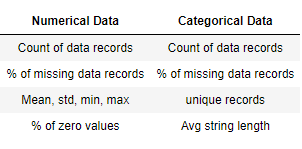

In [ ]:
 #let's generate our stats using generate_statistics_dataframe()

 train_stats=tfdv.generate_statistics_from_dataframe(train_data)

In [ ]:
# it's time to visualize them
tfdv.visualize_statistics(train_stats)

* **Infer data schema**

The schema is created on a dataset that you consider as reference, and can be reused to validate other incoming datasets.

It desribes certain charcteristics such as column data types and expected value ranges.


In [ ]:
schema=tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'age',INT,required,,-
'workclass',STRING,required,,'workclass'
'fnlwgt',INT,required,,-
'education',STRING,required,,'education'
'education-num',INT,required,,-
'marital-status',STRING,required,,'marital-status'
'occupation',STRING,required,,'occupation'
'relationship',STRING,required,,'relationship'
'race',STRING,required,,'race'


,Values
Domain,
'workclass',"'?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'"
'education',"'10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'"
'marital-status',"'Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'"
'occupation',"'?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'"
'relationship',"'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'"
'race',"'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'"
'sex',"'Female', 'Male'"
'native-country',"'?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'"
'label',"'<=50K', '>50K'"


* **generate stats on evaluation data**

In [ ]:
##compare stats of train and test(side-by-side)
eval_stats=tfdv.generate_statistics_from_dataframe(test_data)
tfdv.visualize_statistics(
    lhs_statistics=eval_stats,
    rhs_statistics=train_stats,
    lhs_name='EVAL_DATASET',
    rhs_name='TRAIN_DATASET'
)

By looking to the generated stats we can easily see that:

- min age=0 and max age =1000 or 90 not possible (outliers)


In [ ]:
test_data=test_data[(test_data['age']>=17) & (test_data['age']<=90)]

In [ ]:
##compare stats of train and test again(side-by-side)
eval_stats=tfdv.generate_statistics_from_dataframe(test_data)
tfdv.visualize_statistics(
    lhs_statistics=eval_stats,
    rhs_statistics=train_stats,
    lhs_name='EVAL_DATASET',
    rhs_name='TRAIN_DATASET'
)

* **Check for anomalies using the schema**

In [ ]:
anomalies =  tfdv.validate_statistics(statistics=eval_stats, schema=schema)

# Visualize anomalies
tfdv.display_anomalies(anomalies)

,Anomaly short description,Anomaly long description
Feature name,,
'race',Unexpected string values,Examples contain values missing from the schema: Asian (<1%).
'occupation',Unexpected string values,"Examples contain values missing from the schema: Plumber (<1%), gamer (<1%)."
'native-country',Unexpected string values,"Examples contain values missing from the schema: Australia (<1%), Mongolia (<1%)."


As we can see above TFDV was able to detect irregularties and it tells us about the detected anomalies like values not found in the domain of the training set schema.


WHAT TO DO ?

it depends on our domain knowledge of data whether to tolerate or update the schema to include data from the evalution set

* **Fix anomalies**

In [ ]:
## we can accept the string anomalies reported as valid by tolerating a fraction of missing values
#get the feature from the schema

native_country=tfdv.get_feature(schema,'native-country')

#we ill ensure that at least 90% of the total probability mass of the feature's values is accounted for within the specified domain.
native_country.distribution_constraints.min_domain_mass=0.9

#same for occupation

occupation=tfdv.get_feature(schema,'occupation')
occupation.distribution_constraints.min_domain_mass=0.9



In [ ]:
# Now for the race feature
#we will add a new value to the schema

race_domain=tfdv.get_domain(schema,'race')
race_domain

name: "race"
value: "Amer-Indian-Eskimo"
value: "Asian-Pac-Islander"
value: "Black"
value: "Other"
value: "White"

In [ ]:
#lets add  Asian to the race_domain
race_domain.value.appen('Asian')

AttributeError: ignored

In [ ]:
race

name: "race"
value: "Amer-Indian-Eskimo"
value: "Asian-Pac-Islander"
value: "Black"
value: "Other"
value: "White"
value: "Asian"